# Delitos en los municipios de NY

Integrantes: Mario Mallea y Maximiliano Ramírez.

En un principio trabajaremos con el conjunto de entrenamiento, particionando este en, train y test de forma de poder realizar las técnicas usuales y familiarizarnos con el problema. Esto se puede ver como una técnica de validación.
Procederemos en 4 puntos, un modelo que preserve la temporalidada en 1), luego dividiremos el problema en 2), a este añadiremos una técnica de multioitput en 3) y finalmente haremos selección de modelos en 4).

**El modelo final:** Aquí probamos dos modelos con lo aprendido en validación, a pesar que el primer modelo funcionó levemente mejor en los resultados públicos de la competencia, el segundo modelo añade al primero la selección de hiperparámetros y la estandarización de los datos.

Librerías necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")


Lectura de datos entrenamiento

In [2]:
x_train= pd.read_csv("x_train.csv")
y_train= pd.read_csv("y_train.csv")

 Pre-procesamiento de datos

In [3]:
## Prepocesamiento entramiento

x_train=x_train.drop(["Other","Unknown"],axis=1) ##solo tienen ceros

categoricas_codificado=pd.get_dummies(list(x_train.dtypes[x_train.dtypes == "object"].index))

categorica_features = list(x_train.dtypes[x_train.dtypes == "object"].index) #columnas categoricas
categoricas=x_train.loc[:,categorica_features] #sus datos
categoricas_codificado=pd.get_dummies(categoricas)

numeric_features = list(x_train.dtypes[x_train.dtypes != "object"].index) #columnas numericas
numericas=x_train.loc[:,numeric_features] #sus datos
numericas= pd.DataFrame(data=numericas, columns= numeric_features)




## Estandarización 
year = numericas.year
week = numericas.week
df_procesado_2 = numericas.drop(["year","week"],axis=1)
scaler = StandardScaler()
scaler.fit(df_procesado_2)
df_procesado_3=pd.DataFrame(data= scaler.transform(df_procesado_2),columns= df_procesado_2.columns)

df_procesado_4= pd.concat([categoricas_codificado,df_procesado_3], axis=1, sort=False)
df_procesado=pd.concat((df_procesado_4,year,week),axis=1)


## obtenemos la informacion de ciudad y semana para el train

año=[]
for i in y_train['year_week_borough']:
    aux= i.split('_')
    año.append(int(aux[-3].strip()))

y_train['year'] = año
y_train= y_train.drop('year_week_borough',axis=1)

In [4]:
## Y a trabajar
y_train

,Felony,Misdemeanor,Violation,year
0,446,1651,41,2012
1,293,1072,41,2012
2,382,1105,37,2012
3,453,1236,54,2012
4,366,1204,57,2012
...,...,...,...,...
1705,81,137,0,2018
1706,62,163,0,2018
1707,54,93,0,2018
1708,59,108,0,2018


In [5]:
## X a trabajar
df_procesado

,Borough_Bronx,Borough_Brooklyn,Borough_Manhattan,Borough_Queens,Borough_Staten island,Housing,Other jurisdiction,Patrol,Transit,18-24,...,Other vehicular,Passing or lane usage improper,Passing too closely,Prescription medication,Traffic control disregarded,Turning improperly,Unsafe lane changing,Unspecified,year,week
0,1,0,0,0,0,1.165259,-0.112378,1.616657,0.346693,1.800804,...,-0.994905,-0.680099,-0.676201,-0.563182,-1.218644,-1.145703,-0.629373,-1.127195,2012,1
1,1,0,0,0,0,0.844420,-0.469481,0.289162,-0.206801,0.533417,...,-0.994905,-0.680099,-0.676201,-0.813453,-1.218644,-1.145703,-0.629373,-1.154663,2012,26
2,1,0,0,0,0,0.623843,-0.737309,0.525481,-0.028254,0.926129,...,-0.679618,-0.680099,-0.676201,0.187630,-0.372913,-0.942408,-0.629373,0.115722,2012,27
3,1,0,0,0,0,0.182689,0.244726,0.922085,0.203856,1.074883,...,-0.805733,-0.680099,-0.676201,-0.312911,-0.880352,-0.230876,-0.629373,-0.007883,2012,28
4,1,0,0,0,0,0.764210,0.200088,0.628228,0.194929,1.116534,...,-0.742676,-0.680099,-0.676201,-0.062641,-0.880352,-0.840761,-0.629373,-0.097153,2012,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,0,0,0,0,1,-1.301194,-1.362240,-1.683586,-1.108460,-1.638396,...,-0.868790,-0.460864,-0.397372,-0.813453,-1.049498,-0.739113,-0.092119,-1.230199,2018,48
1706,0,0,0,0,1,-1.261089,-1.094412,-1.685641,-1.108460,-1.680047,...,-0.553503,-0.387786,-0.397372,-0.813453,-0.880352,-1.145703,-0.521922,-1.175264,2018,49
1707,0,0,0,0,1,-1.301194,-1.228326,-1.835652,-1.108460,-1.799050,...,-0.742676,-0.314707,-0.606494,-0.813453,-1.049498,-0.942408,-0.521922,-1.243933,2018,50
1708,0,0,0,0,1,-1.301194,-1.139050,-1.798663,-1.108460,-1.680047,...,-0.868790,-0.241629,-0.536787,-0.688317,-0.711206,-0.739113,-0.521922,-1.230199,2018,51


La primera idea de modelamiento fue predecir el 2018 sobre el conjunto de entrenamiento, es decir la información para 2018 será nuestro conjunto de test, con la idea de preservar la naturaleza temporal del problema. (si queremos predecir el 2019 primero veamos como lo hacemos para el 2018)

# 1) Predecir 2018 a partir de los años anteriores

In [6]:
## dividimos X e Y en train y test
X_test= df_procesado[(df_procesado["year"]==2018)]
X_train= df_procesado.drop(list(X_test.index),axis=0)

Y_test= y_train[y_train["year"]==2018].drop(["year"],axis=1)
y_train= y_train[y_train["year"]!=2018].drop(["year"],axis=1)
print( 'El porcentaje utilizado para test es: ',Y_test.shape[0]/(y_train.shape[0])*100)

El porcentaje utilizado para test es:  17.93103448275862


Modelo

In [7]:
from sklearn import linear_model
clf = linear_model.Ridge(alpha=.5)
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)

Cuando el output es multidimensional, los modelos de sktlearn automaticamente aplican modelos independientes.

In [8]:
(mean_squared_error(Y_test['Felony'], y_pred[:,0]) +
mean_squared_error(Y_test['Misdemeanor'],y_pred[:,1]) +
mean_squared_error(Y_test['Violation'], y_pred[:,2]))/3

1119.8921017978653

Como el resultado no fue bueno decidimos dividir el problema de regresión por semana y municipio, dado que es razonable que para diferentes municipios existan diferentes condiciones de delincuencia y por otro lado que existan patrones relevantes por estacionalidad del año por ello decidimos dividir por trimestres.

# 2) Modelo por semana y por municipio (igualmente test año 2018)

In [9]:
## Prepocesamiento entramiento
x_train= pd.read_csv("x_train.csv")
y_train= pd.read_csv("y_train.csv")

x_train=x_train.drop(["Other","Unknown"],axis=1) ##solo tienen ceros

categoricas_codificado=pd.get_dummies(list(x_train.dtypes[x_train.dtypes == "object"].index))

categorica_features = list(x_train.dtypes[x_train.dtypes == "object"].index) #columnas categoricas
categoricas=x_train.loc[:,categorica_features] #sus datos
categoricas_codificado=pd.get_dummies(categoricas)

numeric_features = list(x_train.dtypes[x_train.dtypes != "object"].index) #columnas numericas
numericas=x_train.loc[:,numeric_features] #sus datos
numericas= pd.DataFrame(data=numericas, columns= numeric_features)




## Estandarización 
year = numericas.year
week = numericas.week
df_procesado_2 = numericas.drop(["year","week"],axis=1)
scaler = StandardScaler()
scaler.fit(df_procesado_2)
df_procesado_3=pd.DataFrame(data= scaler.transform(df_procesado_2),columns= df_procesado_2.columns)

df_procesado_4= pd.concat([categoricas_codificado,df_procesado_3], axis=1, sort=False)
df_procesado=pd.concat((df_procesado_4,year,week),axis=1)


## obtenemos la informacion de ciudad y semana para el train
ciudad=[]
semana= []
año=[]
for i in y_train['year_week_borough']:
    aux= i.split('_')
    ciudad.append(aux[-1].strip())
    semana.append(int(aux[-2].strip()))
    año.append(int(aux[-3].strip()))
y_train['week'] = semana
y_train['city'] = ciudad
y_train['year'] = año
y_train= y_train.drop('year_week_borough',axis=1)

In [10]:
## tuplas que tendrán modelos
subset=[]

for ciudad in y_train['city'].unique():
    for rango in [13, 26, 39, 52]:
        subset.append((rango,ciudad))
subset    

[(13, 'Bronx'),
 (26, 'Bronx'),
 (39, 'Bronx'),
 (52, 'Bronx'),
 (13, 'Brooklyn'),
 (26, 'Brooklyn'),
 (39, 'Brooklyn'),
 (52, 'Brooklyn'),
 (13, 'Manhattan'),
 (26, 'Manhattan'),
 (39, 'Manhattan'),
 (52, 'Manhattan'),
 (13, 'Queens'),
 (26, 'Queens'),
 (39, 'Queens'),
 (52, 'Queens'),
 (13, 'Staten island'),
 (26, 'Staten island'),
 (39, 'Staten island'),
 (52, 'Staten island')]

In [11]:
y_copia= y_train.copy()

y_copia['prediccion Felony']= np.nan
y_copia['prediccion Misdemeanor']= np.nan
y_copia['prediccion Violation']= np.nan

for tupla in subset:
    sem, ciu = tupla
    X= df_procesado[(df_procesado['week'] <= sem) & (df_procesado['week'] > sem-13)  & (df_procesado['Borough_' +str(ciu)] == 1)]
    Y= y_train[(y_train['week'] <= sem) &(y_train['week'] > sem-13) & (y_train['city'] == ciu)]
    
    #print("El modelo para:",sem, ciu, "tamaño:", Y.shape[0], '-', round(Y.shape[0]/y_train.shape[0]*100,2))
    
    Y_test = y_train[(y_train['week'] <= sem) & (y_train['week'] > sem-13) & (y_train['city'] == ciu) & (y_train['year'] == 2018)]
    
    X_test= df_procesado[(df_procesado['week'] <= sem) & (df_procesado['week'] > sem-13) & (df_procesado['Borough_' +str(ciu)] == 1)& (df_procesado['year'] == 2018)]
    
    #print('tamaño test:', Y_test.shape[0],'-', round(Y_test.shape[0]/Y.shape[0]*100,2),'tamaño train:', Y.shape[0], '-', round(Y.shape[0]/Y.shape[0]*100,2))
    
    #Entrenamiento
    
    clf = linear_model.Ridge(alpha=.5)
    clf.fit(X,Y.drop(['week', 'city','year'],axis=1))
    y_pred= clf.predict(X_test)
    

    y_pred[:,0] = [int(max(0, int(x))) for x in y_pred[:,0]]
    y_pred[:,1] = [int(max(0, int(x))) for x in y_pred[:,1]]
    y_pred[:,2] = [int(max(0, int(x))) for x in y_pred[:,2]]
    
    y_copia.loc[list(Y_test.index), ['prediccion Felony', 'prediccion Misdemeanor', 'prediccion Violation']] = y_pred.tolist()


y_2018= y_copia[y_copia['year']==2018]
(mean_squared_error(y_2018['Felony'], y_2018['prediccion Felony']) +
mean_squared_error(y_2018['Misdemeanor'], y_2018['prediccion Misdemeanor']) +
mean_squared_error(y_2018['Violation'], y_2018['prediccion Violation']))/3

234.26282051282053

Mejoró el modelo!!!(divide y vencerás)

Apesar de mejorar el modelo aún es pobre, para ellos graficaremos nuestras predicciones versus los valores reales, asi bajo esta técnica (propia) si los puntos tienden a formar la recta identidad es porque el predictor es bueno.

# Evaluación vía gráficas

<AxesSubplot:xlabel='Felony'>

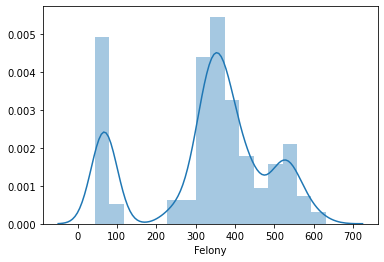

In [12]:
sns.distplot(y_2018.Felony)

<AxesSubplot:xlabel='Misdemeanor'>

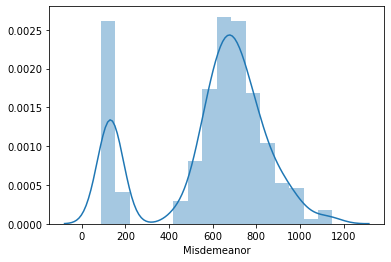

In [13]:
sns.distplot(y_2018.Misdemeanor)

<AxesSubplot:xlabel='Violation'>

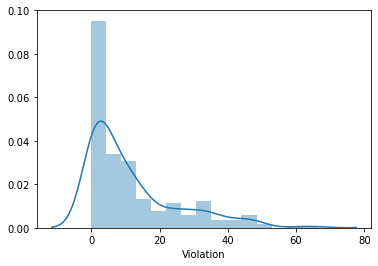

In [14]:
sns.distplot(y_2018.Violation)

Violation está sesgado a ser cero

<AxesSubplot:xlabel='Violation', ylabel='prediccion Violation'>

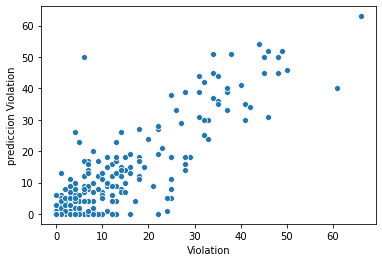

In [15]:
#algo está pasando
sns.scatterplot(
    x='Violation',
    y='prediccion Violation',
    data=y_2018,
)   

<AxesSubplot:xlabel='Misdemeanor', ylabel='prediccion Misdemeanor'>

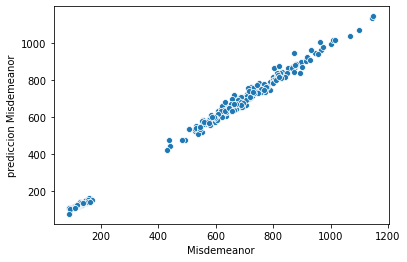

In [16]:
## bien
sns.scatterplot(
    x='Misdemeanor',
    y='prediccion Misdemeanor',
    data=y_2018,
)   

<AxesSubplot:xlabel='Felony', ylabel='prediccion Felony'>

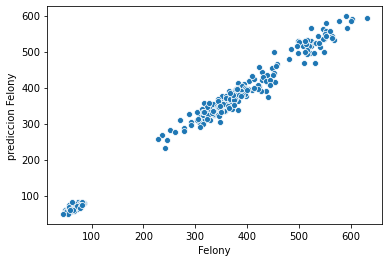

In [17]:
#bien
sns.scatterplot(
    x='Felony',
    y='prediccion Felony',
    data=y_2018,
)   

# 3) Añadimos técnica de regresión multiOutput

In [18]:
from sklearn.multioutput import RegressorChain

Esta técnica consiste en realizar regresiones en orden incorporando en la regresión i+1 la información de i. Así como vimos que el delito Violation es que el peor estamos prediciendo, la idea sería utilizarlo como último regresor entrenable de manera que la información de los otros dos ayude a mejorar el error cuadrático medio. 
 
RegressorChain requiere una lista de ordenes a utilizar, la dejamos por default porque coincide que Violation es el último.

In [19]:
y_copia= y_train.copy()

y_copia['prediccion Felony']= np.nan
y_copia['prediccion Misdemeanor']= np.nan
y_copia['prediccion Violation']= np.nan

for tupla in subset:
    sem, ciu = tupla
    X= df_procesado[(df_procesado['week'] <= sem) & (df_procesado['week'] > sem-13)  & (df_procesado['Borough_' +str(ciu)] == 1)]
    Y= y_train[(y_train['week'] <= sem) &(y_train['week'] > sem-13) & (y_train['city'] == ciu)]
    
    #print("El modelo para:",sem, ciu, "tamaño:", Y.shape[0], '-', round(Y.shape[0]/y_train.shape[0]*100,2))
    
    Y_test = y_train[(y_train['week'] <= sem) & (y_train['week'] > sem-13) & (y_train['city'] == ciu) & (y_train['year'] == 2018)]
    
    X_test= df_procesado[(df_procesado['week'] <= sem) & (df_procesado['week'] > sem-13) & (df_procesado['Borough_' +str(ciu)] == 1)& (df_procesado['year'] == 2018)]
    
    #print('tamaño test:', Y_test.shape[0],'-', round(Y_test.shape[0]/Y.shape[0]*100,2),'tamaño train:', Y.shape[0], '-', round(Y.shape[0]/Y.shape[0]*100,2))
    
    #Entrenamiento
    
    clf = linear_model.Ridge(alpha=.5)
    model = RegressorChain(clf)
    model.fit(X,Y.drop(['week', 'city','year'],axis=1))
    y_pred= model.predict(X_test)
    

    y_pred[:,0] = [int(max(0, int(x))) for x in y_pred[:,0]]
    y_pred[:,1] = [int(max(0, int(x))) for x in y_pred[:,1]]
    y_pred[:,2] = [int(max(0, int(x))) for x in y_pred[:,2]]
    
    y_copia.loc[list(Y_test.index), ['prediccion Felony', 'prediccion Misdemeanor', 'prediccion Violation']] = y_pred.tolist()

y_2018= y_copia[y_copia['year']==2018]

(mean_squared_error(y_2018['Felony'], y_2018['prediccion Felony']) +
mean_squared_error(y_2018['Misdemeanor'], y_2018['prediccion Misdemeanor']) +
mean_squared_error(y_2018['Violation'], y_2018['prediccion Violation']))/3

234.26282051282053

# 4) Selección de modelos e hiperparámetros del mejor.


Probaremos diferentes modelos

In [20]:
## Prepocesamiento entramiento
x_train= pd.read_csv("x_train.csv")
y_train= pd.read_csv("y_train.csv")

x_train=x_train.drop(["Other","Unknown"],axis=1) ##solo tienen ceros

categoricas_codificado=pd.get_dummies(list(x_train.dtypes[x_train.dtypes == "object"].index))

categorica_features = list(x_train.dtypes[x_train.dtypes == "object"].index) #columnas categoricas
categoricas=x_train.loc[:,categorica_features] #sus datos
categoricas_codificado=pd.get_dummies(categoricas)

numeric_features = list(x_train.dtypes[x_train.dtypes != "object"].index) #columnas numericas
numericas=x_train.loc[:,numeric_features] #sus datos
numericas= pd.DataFrame(data=numericas, columns= numeric_features)




## Estandarización 
year = numericas.year
week = numericas.week
df_procesado_2 = numericas.drop(["year","week"],axis=1)
scaler = StandardScaler()
scaler.fit(df_procesado_2)
df_procesado_3=pd.DataFrame(data= scaler.transform(df_procesado_2),columns= df_procesado_2.columns)

df_procesado_4= pd.concat([categoricas_codificado,df_procesado_3], axis=1, sort=False)
df_procesado=pd.concat((df_procesado_4,year,week),axis=1)


## obtenemos la informacion de ciudad y semana para el train
ciudad=[]
semana= []
año=[]
for i in y_train['year_week_borough']:
    aux= i.split('_')
    ciudad.append(aux[-1].strip())
    semana.append(int(aux[-2].strip()))
    año.append(int(aux[-3].strip()))
y_train['week'] = semana
y_train['city'] = ciudad
y_train['year'] = año
y_train= y_train.drop('year_week_borough',axis=1)

Regrsión lineal Ridge:

In [21]:


y_copia= y_train.copy()

y_copia['prediccion Felony']= np.nan
y_copia['prediccion Misdemeanor']= np.nan
y_copia['prediccion Violation']= np.nan

for tupla in subset:
    sem, ciu = tupla
    X= df_procesado[(df_procesado['week'] <= sem) & (df_procesado['week'] > sem-13)  & (df_procesado['Borough_' +str(ciu)] == 1)]
    Y= y_train[(y_train['week'] <= sem) &(y_train['week'] > sem-13) & (y_train['city'] == ciu)]
    
    #print("El modelo para:",sem, ciu, "tamaño:", Y.shape[0], '-', round(Y.shape[0]/y_train.shape[0]*100,2))
    
    Y_test = y_train[(y_train['week'] <= sem) & (y_train['week'] > sem-13) & (y_train['city'] == ciu) & (y_train['year'] == 2018)]
    
    X_test= df_procesado[(df_procesado['week'] <= sem) & (df_procesado['week'] > sem-13) & (df_procesado['Borough_' +str(ciu)] == 1)& (df_procesado['year'] == 2018)]
    
    #print('tamaño test:', Y_test.shape[0],'-', round(Y_test.shape[0]/Y.shape[0]*100,2),'tamaño train:', Y.shape[0], '-', round(Y.shape[0]/Y.shape[0]*100,2))
    
    #Entrenamiento
    
    clf = linear_model.Ridge(alpha=.5)
    model = RegressorChain(clf)
    model.fit(X,Y.drop(['week', 'city','year'],axis=1))
    y_pred= model.predict(X_test)
    

    y_pred[:,0] = [int(max(0, int(x))) for x in y_pred[:,0]]
    y_pred[:,1] = [int(max(0, int(x))) for x in y_pred[:,1]]
    y_pred[:,2] = [int(max(0, int(x))) for x in y_pred[:,2]]
    
    y_copia.loc[list(Y_test.index), ['prediccion Felony', 'prediccion Misdemeanor', 'prediccion Violation']] = y_pred.tolist()
y_2018= y_copia[y_copia['year']==2018]

(mean_squared_error(y_2018['Felony'], y_2018['prediccion Felony']) +
mean_squared_error(y_2018['Misdemeanor'], y_2018['prediccion Misdemeanor']) +
mean_squared_error(y_2018['Violation'], y_2018['prediccion Violation']))/3

234.26282051282053

SVM en regresión:

In [22]:

from sklearn.svm import SVR

y_copia= y_train.copy()

y_copia['prediccion Felony']= np.nan
y_copia['prediccion Misdemeanor']= np.nan
y_copia['prediccion Violation']= np.nan

for tupla in subset:
    sem, ciu = tupla
    X= df_procesado[(df_procesado['week'] <= sem) & (df_procesado['week'] > sem-13)  & (df_procesado['Borough_' +str(ciu)] == 1)]
    Y= y_train[(y_train['week'] <= sem) &(y_train['week'] > sem-13) & (y_train['city'] == ciu)]
    
    #print("El modelo para:",sem, ciu, "tamaño:", Y.shape[0], '-', round(Y.shape[0]/y_train.shape[0]*100,2))
    
    Y_test = y_train[(y_train['week'] <= sem) & (y_train['week'] > sem-13) & (y_train['city'] == ciu) & (y_train['year'] == 2018)]
    
    X_test= df_procesado[(df_procesado['week'] <= sem) & (df_procesado['week'] > sem-13) & (df_procesado['Borough_' +str(ciu)] == 1)& (df_procesado['year'] == 2018)]
    
    #print('tamaño test:', Y_test.shape[0],'-', round(Y_test.shape[0]/Y.shape[0]*100,2),'tamaño train:', Y.shape[0], '-', round(Y.shape[0]/Y.shape[0]*100,2))
    
    #Entrenamiento
    
    clf = SVR()
    model = RegressorChain(clf)
    model.fit(X,Y.drop(['week', 'city','year'],axis=1))
    y_pred= model.predict(X_test)
    

    y_pred[:,0] = [int(max(0, int(x))) for x in y_pred[:,0]]
    y_pred[:,1] = [int(max(0, int(x))) for x in y_pred[:,1]]
    y_pred[:,2] = [int(max(0, int(x))) for x in y_pred[:,2]]
    
    y_copia.loc[list(Y_test.index), ['prediccion Felony', 'prediccion Misdemeanor', 'prediccion Violation']] = y_pred.tolist()
y_2018= y_copia[y_copia['year']==2018]

(mean_squared_error(y_2018['Felony'], y_2018['prediccion Felony']) +
mean_squared_error(y_2018['Misdemeanor'], y_2018['prediccion Misdemeanor']) +
mean_squared_error(y_2018['Violation'], y_2018['prediccion Violation']))/3

32351.05641025641

Regresión logistica:

In [23]:
from sklearn.linear_model import LogisticRegression

y_copia= y_train.copy()

y_copia['prediccion Felony']= np.nan
y_copia['prediccion Misdemeanor']= np.nan
y_copia['prediccion Violation']= np.nan

for tupla in subset:
    sem, ciu = tupla
    X= df_procesado[(df_procesado['week'] <= sem) & (df_procesado['week'] > sem-13)  & (df_procesado['Borough_' +str(ciu)] == 1)]
    Y= y_train[(y_train['week'] <= sem) &(y_train['week'] > sem-13) & (y_train['city'] == ciu)]
    
    #print("El modelo para:",sem, ciu, "tamaño:", Y.shape[0], '-', round(Y.shape[0]/y_train.shape[0]*100,2))
    
    Y_test = y_train[(y_train['week'] <= sem) & (y_train['week'] > sem-13) & (y_train['city'] == ciu) & (y_train['year'] == 2018)]
    
    X_test= df_procesado[(df_procesado['week'] <= sem) & (df_procesado['week'] > sem-13) & (df_procesado['Borough_' +str(ciu)] == 1)& (df_procesado['year'] == 2018)]
    
    #print('tamaño test:', Y_test.shape[0],'-', round(Y_test.shape[0]/Y.shape[0]*100,2),'tamaño train:', Y.shape[0], '-', round(Y.shape[0]/Y.shape[0]*100,2))
    
    #Entrenamiento
    
    clf = LogisticRegression()
    model = RegressorChain(clf)
    model.fit(X,Y.drop(['week', 'city','year'],axis=1))
    y_pred= model.predict(X_test)
    

    y_pred[:,0] = [int(max(0, int(x))) for x in y_pred[:,0]]
    y_pred[:,1] = [int(max(0, int(x))) for x in y_pred[:,1]]
    y_pred[:,2] = [int(max(0, int(x))) for x in y_pred[:,2]]
    
    y_copia.loc[list(Y_test.index), ['prediccion Felony', 'prediccion Misdemeanor', 'prediccion Violation']] = y_pred.tolist()
y_2018= y_copia[y_copia['year']==2018]

(mean_squared_error(y_2018['Felony'], y_2018['prediccion Felony']) +
mean_squared_error(y_2018['Misdemeanor'], y_2018['prediccion Misdemeanor']) +
mean_squared_error(y_2018['Violation'], y_2018['prediccion Violation']))/3

1660.9615384615383

Regresión lineal Lasso:

In [24]:

y_copia= y_train.copy()

y_copia['prediccion Felony']= np.nan
y_copia['prediccion Misdemeanor']= np.nan
y_copia['prediccion Violation']= np.nan

for tupla in subset:
    sem, ciu = tupla
    X= df_procesado[(df_procesado['week'] <= sem) & (df_procesado['week'] > sem-13)  & (df_procesado['Borough_' +str(ciu)] == 1)]
    Y= y_train[(y_train['week'] <= sem) &(y_train['week'] > sem-13) & (y_train['city'] == ciu)]
    
    #print("El modelo para:",sem, ciu, "tamaño:", Y.shape[0], '-', round(Y.shape[0]/y_train.shape[0]*100,2))
    
    Y_test = y_train[(y_train['week'] <= sem) & (y_train['week'] > sem-13) & (y_train['city'] == ciu) & (y_train['year'] == 2018)]
    
    X_test= df_procesado[(df_procesado['week'] <= sem) & (df_procesado['week'] > sem-13) & (df_procesado['Borough_' +str(ciu)] == 1)& (df_procesado['year'] == 2018)]
    
    #print('tamaño test:', Y_test.shape[0],'-', round(Y_test.shape[0]/Y.shape[0]*100,2),'tamaño train:', Y.shape[0], '-', round(Y.shape[0]/Y.shape[0]*100,2))
    
    #Entrenamiento
    
    clf = linear_model.Lasso(alpha=.5)
    model = RegressorChain(clf)
    model.fit(X,Y.drop(['week', 'city','year'],axis=1))
    y_pred= model.predict(X_test)
    

    y_pred[:,0] = [int(max(0, int(x))) for x in y_pred[:,0]]
    y_pred[:,1] = [int(max(0, int(x))) for x in y_pred[:,1]]
    y_pred[:,2] = [int(max(0, int(x))) for x in y_pred[:,2]]
    
    y_copia.loc[list(Y_test.index), ['prediccion Felony', 'prediccion Misdemeanor', 'prediccion Violation']] = y_pred.tolist()
y_2018= y_copia[y_copia['year']==2018]

(mean_squared_error(y_2018['Felony'], y_2018['prediccion Felony']) +
mean_squared_error(y_2018['Misdemeanor'], y_2018['prediccion Misdemeanor']) +
mean_squared_error(y_2018['Violation'], y_2018['prediccion Violation']))/3

292.8884615384615

Dado que la regresión Ridge obtuvo el menor error cuadrático medio en promedio de la tres regresiones, encontraremos su mejor hiper parámetro $\alpha$, esto lo haremos para cada submodelo estacionalidad-municipio con los cuales estamos trabajando.

In [25]:
from sklearn.model_selection import GridSearchCV

y_copia= y_train.copy()

y_copia['prediccion Felony']= np.nan
y_copia['prediccion Misdemeanor']= np.nan
y_copia['prediccion Violation']= np.nan

parametros_modelos=[]

for tupla in subset:
    sem, ciu = tupla
    X= df_procesado[(df_procesado['week'] <= sem) & (df_procesado['week'] > sem-13)  & (df_procesado['Borough_' +str(ciu)] == 1)]
    Y= y_train[(y_train['week'] <= sem) &(y_train['week'] > sem-13) & (y_train['city'] == ciu)]
    
    #print("El modelo para:",sem, ciu, "tamaño:", Y.shape[0], '-', round(Y.shape[0]/y_train.shape[0]*100,2))
    
    Y_test = y_train[(y_train['week'] <= sem) & (y_train['week'] > sem-13) & (y_train['city'] == ciu) & (y_train['year'] == 2018)]
    
    X_test= df_procesado[(df_procesado['week'] <= sem) & (df_procesado['week'] > sem-13) & (df_procesado['Borough_' +str(ciu)] == 1)& (df_procesado['year'] == 2018)]
    
    #print('tamaño test:', Y_test.shape[0],'-', round(Y_test.shape[0]/Y.shape[0]*100,2),'tamaño train:', Y.shape[0], '-', round(Y.shape[0]/Y.shape[0]*100,2))
    
    #Entrenamiento
    maxi=0
    for a in [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]:
        clf = linear_model.Ridge(alpha= a)
        model = RegressorChain(clf)
        model.fit(X,Y.drop(['week', 'city','year'],axis=1))
        y_pred= model.predict(X_test)


        y_pred[:,0] = [int(max(0, int(x))) for x in y_pred[:,0]]
        y_pred[:,1] = [int(max(0, int(x))) for x in y_pred[:,1]]
        y_pred[:,2] = [int(max(0, int(x))) for x in y_pred[:,2]]
        

        s= (mean_squared_error(Y_test['Felony'], y_pred[:,0]) +mean_squared_error(Y_test['Misdemeanor'],y_pred[:,1]) + mean_squared_error(Y_test['Violation'], y_pred[:,2]))/3
        if s>maxi:
            maxi=s
            mejor_a=a
    print("el mejor ",mejor_a,"modelo ", sem,ciu)
    parametros_modelos.append((sem,ciu,mejor_a))

el mejor  0.1 modelo  13 Bronx
el mejor  0.9 modelo  26 Bronx
el mejor  1 modelo  39 Bronx
el mejor  0.1 modelo  52 Bronx
el mejor  0.1 modelo  13 Brooklyn
el mejor  0.1 modelo  26 Brooklyn
el mejor  1 modelo  39 Brooklyn
el mejor  1 modelo  52 Brooklyn
el mejor  1 modelo  13 Manhattan
el mejor  0.1 modelo  26 Manhattan
el mejor  0.1 modelo  39 Manhattan
el mejor  0.1 modelo  52 Manhattan
el mejor  1 modelo  13 Queens
el mejor  1 modelo  26 Queens
el mejor  1 modelo  39 Queens
el mejor  0.8 modelo  52 Queens
el mejor  1 modelo  13 Staten island
el mejor  1 modelo  26 Staten island
el mejor  0.9 modelo  39 Staten island
el mejor  0.1 modelo  52 Staten island


In [26]:
parametros_modelos

[(13, 'Bronx', 0.1),
 (26, 'Bronx', 0.9),
 (39, 'Bronx', 1),
 (52, 'Bronx', 0.1),
 (13, 'Brooklyn', 0.1),
 (26, 'Brooklyn', 0.1),
 (39, 'Brooklyn', 1),
 (52, 'Brooklyn', 1),
 (13, 'Manhattan', 1),
 (26, 'Manhattan', 0.1),
 (39, 'Manhattan', 0.1),
 (52, 'Manhattan', 0.1),
 (13, 'Queens', 1),
 (26, 'Queens', 1),
 (39, 'Queens', 1),
 (52, 'Queens', 0.8),
 (13, 'Staten island', 1),
 (26, 'Staten island', 1),
 (39, 'Staten island', 0.9),
 (52, 'Staten island', 0.1)]

# Predicciones para el test original: 1er modelo: Score 24 en Kaggle

Este modelo no se estandariza y ocupa la misma regresión lineal ridge con parámetro 0.5 para todos los sub modelos.

In [27]:
## Prepocesamiento entramiento
x_train= pd.read_csv("x_train.csv")
y_train= pd.read_csv("y_train.csv")

x_train=x_train.drop(["Other","Unknown"],axis=1) ##solo tienen ceros

categoricas_codificado=pd.get_dummies(list(x_train.dtypes[x_train.dtypes == "object"].index))

categorica_features = list(x_train.dtypes[x_train.dtypes == "object"].index) #columnas categoricas
categoricas=x_train.loc[:,categorica_features] #sus datos
categoricas_codificado=pd.get_dummies(categoricas)

numeric_features = list(x_train.dtypes[x_train.dtypes != "object"].index) #columnas numericas
numericas=x_train.loc[:,numeric_features] #sus datos
numericas= pd.DataFrame(data=numericas, columns= numeric_features)


df_procesado= pd.concat([categoricas_codificado,numericas], axis=1, sort=False)





In [28]:
## leemos test
y_test_p = pd.read_csv("y_test_pattern.csv")
x_test= pd.read_csv("x_test.csv")

In [29]:
## obtenemos la informacion de ciudad y semana para el test
ciudad=[]
semana= []

for i in y_test_p['year_week_borough']:
    aux= i.split('_')
    ciudad.append(aux[-1].strip())
    semana.append(int(aux[-2].strip()))
    
y_test_p['week'] = semana
y_test_p['city'] = ciudad
y_test_p= y_test_p.drop('year_week_borough',axis=1)

In [30]:
## obtenemos la informacion de ciudad y semana para el train
ciudad=[]
semana= []

for i in y_train['year_week_borough']:
    aux= i.split('_')
    ciudad.append(aux[-1].strip())
    semana.append(int(aux[-2].strip()))
    
y_train['week'] = semana
y_train['city'] = ciudad
y_train= y_train.drop('year_week_borough',axis=1)

In [31]:
## llevamos el formato del test al formato del train
ciudad=[]
semana= []
año=[]

for i in x_test['year_week_borough']:
    aux= i.split('_')
    ciudad.append(aux[-1].strip())
    semana.append(int(aux[-2].strip()))
    año.append(int(aux[-3].strip()))
    
x_test['year'] = año
x_test['week'] = semana
x_test['Borough'] = ciudad
x_test= x_test.drop('year_week_borough',axis=1)

x_test=x_test.drop(["Other","Unknown"],axis=1)

categoricas_codificado=pd.get_dummies(list(x_test.dtypes[x_test.dtypes == "object"].index))

categorica_features = list(x_test.dtypes[x_test.dtypes == "object"].index) #columnas categoricas
categoricas=x_test.loc[:,categorica_features] #sus datos
categoricas_codificado=pd.get_dummies(categoricas)

numeric_features = list(x_test.dtypes[x_test.dtypes != "object"].index) #columnas numericas
numericas=x_test.loc[:,numeric_features] #sus datos
numericas= pd.DataFrame(data=numericas, columns= numeric_features)


x_test_df_procesado= pd.concat([categoricas_codificado,numericas], axis=1, sort=False)


In [32]:
#modelos a ejecutar
subset=[]

for ciudad in y_train['city'].unique():
    for rango in [13, 26, 39, 52]:
        subset.append((rango,ciudad))
subset    

[(13, 'Bronx'),
 (26, 'Bronx'),
 (39, 'Bronx'),
 (52, 'Bronx'),
 (13, 'Brooklyn'),
 (26, 'Brooklyn'),
 (39, 'Brooklyn'),
 (52, 'Brooklyn'),
 (13, 'Manhattan'),
 (26, 'Manhattan'),
 (39, 'Manhattan'),
 (52, 'Manhattan'),
 (13, 'Queens'),
 (26, 'Queens'),
 (39, 'Queens'),
 (52, 'Queens'),
 (13, 'Staten island'),
 (26, 'Staten island'),
 (39, 'Staten island'),
 (52, 'Staten island')]

In [33]:
## cambio de orden de columnas para que queden igual
year = df_procesado.year
week = df_procesado.week
df_procesado_2 = df_procesado.drop(["year","week"],axis=1)
df_procesado=pd.concat((df_procesado_2,year,week),axis=1)

In [34]:
#modelo semanas por intervalos de trimestres y ciudades

from sklearn.multioutput import RegressorChain
for tupla in subset:
    sem, ciu = tupla
    X= df_procesado[(df_procesado['week'] <= sem) & (df_procesado['week'] > sem-13)  & (df_procesado['Borough_' +str(ciu)] == 1)]
    Y= y_train[(y_train['week'] <= sem) &(y_train['week'] > sem-13) & (y_train['city'] == ciu)]
    
    print("El modelo para:",sem, ciu, "tamaño:", Y.shape[0], '-', round(Y.shape[0]/y_train.shape[0]*100,2))
    
    Y_test_kaggle = y_test_p[(y_test_p['week'] <= sem) & (y_test_p['week'] > sem-13) & (y_test_p['city'] == ciu)]
    
    X_test_kaggle= x_test_df_procesado[(x_test_df_procesado['week'] <= sem) & (x_test_df_procesado['week'] > sem-13) & (x_test_df_procesado['Borough_' +str(ciu)] == 1)]
    
    print('tamaño test:', Y_test_kaggle.shape[0],'-', round(Y_test_kaggle.shape[0]/Y.shape[0]*100,2),
          'tamaño train:', Y.shape[0], '-', round(Y.shape[0]/Y.shape[0]*100,2))
    
    #Entrenamiento
    
    clf = linear_model.Ridge(alpha=.5)
    model = RegressorChain(clf)
    model.fit(X,Y.drop(['week', 'city'],axis=1))
    y_pred= model.predict(X_test_kaggle)
    
    if sem==13 and ciu=="Bronx": ## en este caso solo se predicen la 11,12 y 13, pero igualfue entrenado desde la semana 1
        y_pred[:,0] = [int(max(0, int(x))) for x in y_pred[:,0]]
        y_pred[:,1] = [int(max(0, int(x))) for x in y_pred[:,1]]
        y_pred[:,2] = [int(max(0, int(x))) for x in y_pred[:,2]]
        y_test_p.loc[list(Y_test_kaggle.index), ['Felony', 'Misdemeanor', 'Violation']] =  y_pred.tolist()[-3:]
    else:
        y_pred[:,0] = [int(max(0, int(x))) for x in y_pred[:,0]]
        y_pred[:,1] = [int(max(0, int(x))) for x in y_pred[:,1]]
        y_pred[:,2] = [int(max(0, int(x))) for x in y_pred[:,2]]
        y_test_p.loc[list(Y_test_kaggle.index), ['Felony', 'Misdemeanor', 'Violation']] = y_pred.tolist()

El modelo para: 13 Bronx tamaño: 79 - 4.62
tamaño test: 3 - 3.8 tamaño train: 79 - 100.0
El modelo para: 26 Bronx tamaño: 79 - 4.62
tamaño test: 13 - 16.46 tamaño train: 79 - 100.0
El modelo para: 39 Bronx tamaño: 91 - 5.32
tamaño test: 13 - 14.29 tamaño train: 91 - 100.0
El modelo para: 52 Bronx tamaño: 91 - 5.32
tamaño test: 13 - 14.29 tamaño train: 91 - 100.0
El modelo para: 13 Brooklyn tamaño: 79 - 4.62
tamaño test: 13 - 16.46 tamaño train: 79 - 100.0
El modelo para: 26 Brooklyn tamaño: 79 - 4.62
tamaño test: 13 - 16.46 tamaño train: 79 - 100.0
El modelo para: 39 Brooklyn tamaño: 91 - 5.32
tamaño test: 13 - 14.29 tamaño train: 91 - 100.0
El modelo para: 52 Brooklyn tamaño: 91 - 5.32
tamaño test: 13 - 14.29 tamaño train: 91 - 100.0
El modelo para: 13 Manhattan tamaño: 79 - 4.62
tamaño test: 13 - 16.46 tamaño train: 79 - 100.0
El modelo para: 26 Manhattan tamaño: 79 - 4.62
tamaño test: 13 - 16.46 tamaño train: 79 - 100.0
El modelo para: 39 Manhattan tamaño: 91 - 5.32
tamaño test: 13 

In [35]:
## guardamos las predicciones
y_test_2 = pd.read_csv("y_test_pattern.csv")
resultados=y_test_p.drop(["week","city"],axis=1)
resultados["year_week_borough"]= y_test_2.year_week_borough
resultados.to_csv(r'C:\Users\Mario\python\machine_learning\entrega.csv', index = False)

In [36]:
resultados

,Felony,Misdemeanor,Violation,year_week_borough
0,340.0,659.0,20.0,2019_11_Bronx
1,313.0,632.0,30.0,2019_12_Bronx
2,258.0,688.0,13.0,2019_13_Bronx
3,349.0,726.0,6.0,2019_14_Bronx
4,309.0,661.0,9.0,2019_15_Bronx
...,...,...,...,...
245,45.0,68.0,0.0,2019_48_Staten island
246,50.0,105.0,0.0,2019_49_Staten island
247,59.0,106.0,1.0,2019_50_Staten island
248,40.0,82.0,0.0,2019_51_Staten island


In [37]:
## ejemplo de entrega
pd.read_csv("sample_submission_ejemplo_emtrega.csv")

,Felony,Misdemeanor,Violation,year_week_borough
0,317.542118,1302.814500,43.325421,2019_11_Bronx
1,294.914758,614.092060,109.041712,2019_12_Bronx
2,213.039266,460.584152,130.819392,2019_13_Bronx
3,568.618471,939.020902,106.110155,2019_14_Bronx
4,101.270171,1041.687093,179.871542,2019_15_Bronx
...,...,...,...,...
245,628.818493,1103.752265,251.813597,2019_48_Staten island
246,344.013892,1142.931868,178.499005,2019_49_Staten island
247,136.565419,668.991953,87.664780,2019_50_Staten island
248,401.782325,42.847097,94.029624,2019_51_Staten island


# Predicciones para el test original: 2) Modelo Final:  Score 25 en Kaggle

Ahora consideramos $\alpha$ para cada modelo según lo calculado como validación y además estandarizamos.

In [38]:
## Prepocesamiento entramiento
x_train= pd.read_csv("x_train.csv")
y_train= pd.read_csv("y_train.csv")

x_train=x_train.drop(["Other","Unknown"],axis=1) ##solo tienen ceros

categoricas_codificado=pd.get_dummies(list(x_train.dtypes[x_train.dtypes == "object"].index))

categorica_features = list(x_train.dtypes[x_train.dtypes == "object"].index) #columnas categoricas
categoricas=x_train.loc[:,categorica_features] #sus datos
categoricas_codificado=pd.get_dummies(categoricas)

numeric_features = list(x_train.dtypes[x_train.dtypes != "object"].index) #columnas numericas
numericas=x_train.loc[:,numeric_features] #sus datos
numericas= pd.DataFrame(data=numericas, columns= numeric_features)





year = numericas.year
week = numericas.week
df_procesado_2 = numericas.drop(["year","week"],axis=1)
scaler = StandardScaler()
scaler.fit(df_procesado_2)
df_procesado_3=pd.DataFrame(data= scaler.transform(df_procesado_2),columns= df_procesado_2.columns)

df_procesado_4= pd.concat([categoricas_codificado,df_procesado_3], axis=1, sort=False)
df_procesado=pd.concat((df_procesado_4,year,week),axis=1)



In [39]:
## leemos test
y_test_p = pd.read_csv("y_test_pattern.csv")
x_test= pd.read_csv("x_test.csv")

In [40]:
## obtenemos la informacion de ciudad y semana para el test
ciudad=[]
semana= []

for i in y_test_p['year_week_borough']:
    aux= i.split('_')
    ciudad.append(aux[-1].strip())
    semana.append(int(aux[-2].strip()))
    
y_test_p['week'] = semana
y_test_p['city'] = ciudad
y_test_p= y_test_p.drop('year_week_borough',axis=1)

In [41]:
## obtenemos la informacion de ciudad y semana para el train
ciudad=[]
semana= []

for i in y_train['year_week_borough']:
    aux= i.split('_')
    ciudad.append(aux[-1].strip())
    semana.append(int(aux[-2].strip()))
    
y_train['week'] = semana
y_train['city'] = ciudad
y_train= y_train.drop('year_week_borough',axis=1)

In [42]:
## llevamos el formato del test al formato del train
ciudad=[]
semana= []
año=[]

for i in x_test['year_week_borough']:
    aux= i.split('_')
    ciudad.append(aux[-1].strip())
    semana.append(int(aux[-2].strip()))
    año.append(int(aux[-3].strip()))
    
x_test['year'] = año
x_test['week'] = semana
x_test['Borough'] = ciudad
x_test= x_test.drop('year_week_borough',axis=1)

x_test=x_test.drop(["Other","Unknown"],axis=1)

categoricas_codificado=pd.get_dummies(list(x_test.dtypes[x_test.dtypes == "object"].index))

categorica_features = list(x_test.dtypes[x_test.dtypes == "object"].index) #columnas categoricas
categoricas=x_test.loc[:,categorica_features] #sus datos
categoricas_codificado=pd.get_dummies(categoricas)

numeric_features = list(x_test.dtypes[x_test.dtypes != "object"].index) #columnas numericas
numericas=x_test.loc[:,numeric_features] #sus datos
numericas= pd.DataFrame(data=numericas, columns= numeric_features)





year = numericas.year
week = numericas.week
df_procesado_2 = numericas.drop(["year","week"],axis=1)
df_procesado_3=pd.DataFrame(data= scaler.transform(df_procesado_2),columns= df_procesado_2.columns)

df_procesado_4= pd.concat([categoricas_codificado,df_procesado_3], axis=1, sort=False)
x_test_df_procesado=pd.concat((df_procesado_4,year,week),axis=1)

In [43]:
parametros_modelos

[(13, 'Bronx', 0.1),
 (26, 'Bronx', 0.9),
 (39, 'Bronx', 1),
 (52, 'Bronx', 0.1),
 (13, 'Brooklyn', 0.1),
 (26, 'Brooklyn', 0.1),
 (39, 'Brooklyn', 1),
 (52, 'Brooklyn', 1),
 (13, 'Manhattan', 1),
 (26, 'Manhattan', 0.1),
 (39, 'Manhattan', 0.1),
 (52, 'Manhattan', 0.1),
 (13, 'Queens', 1),
 (26, 'Queens', 1),
 (39, 'Queens', 1),
 (52, 'Queens', 0.8),
 (13, 'Staten island', 1),
 (26, 'Staten island', 1),
 (39, 'Staten island', 0.9),
 (52, 'Staten island', 0.1)]

In [44]:
#modelo semanas por intervalos de trimestres y ciudades

from sklearn.multioutput import RegressorChain
for tupla in parametros_modelos:
    sem, ciu, a = tupla
    X= df_procesado[(df_procesado['week'] <= sem) & (df_procesado['week'] > sem-13)  & (df_procesado['Borough_' +str(ciu)] == 1)]
    Y= y_train[(y_train['week'] <= sem) &(y_train['week'] > sem-13) & (y_train['city'] == ciu)]
    
    print("El modelo para:",sem, ciu, "tamaño:", Y.shape[0], '-', round(Y.shape[0]/y_train.shape[0]*100,2))
    
    Y_test_kaggle = y_test_p[(y_test_p['week'] <= sem) & (y_test_p['week'] > sem-13) & (y_test_p['city'] == ciu)]
    
    X_test_kaggle= x_test_df_procesado[(x_test_df_procesado['week'] <= sem) & (x_test_df_procesado['week'] > sem-13) & (x_test_df_procesado['Borough_' +str(ciu)] == 1)]
    
    print('tamaño test:', Y_test_kaggle.shape[0],'-', round(Y_test_kaggle.shape[0]/Y.shape[0]*100,2),
          'tamaño train:', Y.shape[0], '-', round(Y.shape[0]/Y.shape[0]*100,2))
    
    #Entrenamiento
    
    clf = linear_model.Ridge(alpha=a)
    model = RegressorChain(clf)
    model.fit(X,Y.drop(['week', 'city'],axis=1))
    y_pred= model.predict(X_test_kaggle)
    
    if sem==13 and ciu=="Bronx": ## en este caso solo se predicen la 11,12 y 13, pero igualfue entrenado desde la semana 1
        y_pred[:,0] = [int(max(0, int(x))) for x in y_pred[:,0]]
        y_pred[:,1] = [int(max(0, int(x))) for x in y_pred[:,1]]
        y_pred[:,2] = [int(max(0, int(x))) for x in y_pred[:,2]]
        y_test_p.loc[list(Y_test_kaggle.index), ['Felony', 'Misdemeanor', 'Violation']] =  y_pred.tolist()[-3:]
    else:
        y_pred[:,0] = [int(max(0, int(x))) for x in y_pred[:,0]]
        y_pred[:,1] = [int(max(0, int(x))) for x in y_pred[:,1]]
        y_pred[:,2] = [int(max(0, int(x))) for x in y_pred[:,2]]
        y_test_p.loc[list(Y_test_kaggle.index), ['Felony', 'Misdemeanor', 'Violation']] = y_pred.tolist()

El modelo para: 13 Bronx tamaño: 79 - 4.62
tamaño test: 3 - 3.8 tamaño train: 79 - 100.0
El modelo para: 26 Bronx tamaño: 79 - 4.62
tamaño test: 13 - 16.46 tamaño train: 79 - 100.0
El modelo para: 39 Bronx tamaño: 91 - 5.32
tamaño test: 13 - 14.29 tamaño train: 91 - 100.0
El modelo para: 52 Bronx tamaño: 91 - 5.32
tamaño test: 13 - 14.29 tamaño train: 91 - 100.0
El modelo para: 13 Brooklyn tamaño: 79 - 4.62
tamaño test: 13 - 16.46 tamaño train: 79 - 100.0
El modelo para: 26 Brooklyn tamaño: 79 - 4.62
tamaño test: 13 - 16.46 tamaño train: 79 - 100.0
El modelo para: 39 Brooklyn tamaño: 91 - 5.32
tamaño test: 13 - 14.29 tamaño train: 91 - 100.0
El modelo para: 52 Brooklyn tamaño: 91 - 5.32
tamaño test: 13 - 14.29 tamaño train: 91 - 100.0
El modelo para: 13 Manhattan tamaño: 79 - 4.62
tamaño test: 13 - 16.46 tamaño train: 79 - 100.0
El modelo para: 26 Manhattan tamaño: 79 - 4.62
tamaño test: 13 - 16.46 tamaño train: 79 - 100.0
El modelo para: 39 Manhattan tamaño: 91 - 5.32
tamaño test: 13 

In [45]:
## guardamos las predicciones
y_test_2 = pd.read_csv("y_test_pattern.csv")
resultados=y_test_p.drop(["week","city"],axis=1)
resultados["year_week_borough"]= y_test_2.year_week_borough
resultados.to_csv(r'C:\Users\Mario\python\machine_learning\entrega_1.csv', index = False)

In [46]:
resultados

,Felony,Misdemeanor,Violation,year_week_borough
0,347.0,657.0,19.0,2019_11_Bronx
1,324.0,626.0,28.0,2019_12_Bronx
2,275.0,673.0,12.0,2019_13_Bronx
3,341.0,719.0,8.0,2019_14_Bronx
4,308.0,673.0,10.0,2019_15_Bronx
...,...,...,...,...
245,39.0,70.0,0.0,2019_48_Staten island
246,46.0,106.0,0.0,2019_49_Staten island
247,59.0,109.0,1.0,2019_50_Staten island
248,36.0,84.0,0.0,2019_51_Staten island
